# 050. Logistic Regression

## data: 성별 소득 data 에 따라 특정 구매자의 구매할지 여부를 예측

- Logistric Regrssion 모델 작성
- 편향된 data 의 Precision / Recall 계산
- Confusion Matrix 시각화

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [22]:
dataset = pd.read_csv("datasets/Social_Network_Ads.csv")

In [2]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [3]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

### Age, EstimatedSalary 를 변수로 선택

In [5]:
X = dataset.iloc[:, [2,3]].values.astype("float32")
y = dataset.iloc[:, 4].values.astype("float32")

dataset 을 Training 과 Test set 으로 분리

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

### train data 로 fit 하고, test data 는 train data 의 분포에 맞추어 transform

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [8]:
print(X_train.shape)

(320, 2)


### Training set 에 대해 Logistic Regression model 을 fitting

In [9]:
lr_classifier = LogisticRegression(solver='lbfgs', random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### predict

- predict() - 예측된 class 를 threshold 0.5 기준으로 반환
- predict_proba() - class 별 probability 를 반환

In [10]:
y_pred = lr_classifier.predict(X_test)

print(y_pred)
print()
print("Test set 의 true counts = ", sum(y_test))
print("모델이 예측한 predicted true counts = ", sum(y_pred))
print("accuracy = {:.2f}".format(sum(y_pred == y_test) / len(y_test)))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1.]

Test set 의 true counts =  22.0
모델이 예측한 predicted true counts =  18.0
accuracy = 0.93


## confusion matrix 를 이용한 model 평가

In [11]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns

In [12]:
sns.heatmap?

confution matrix
 [[17  5]
 [ 1 57]]


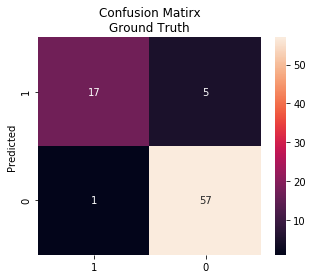

In [14]:
cm  = confusion_matrix(y_test, y_pred, labels=[1, 0])

print("confution matrix\n", cm)

plt.figure(figsize=(5,4))

ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=[1, 0], yticklabels=[1, 0])
ax.set_ylabel('Predicted')
ax.set_title('Confusion Matirx\nGround Truth')
None

In [15]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred, labels=[1, 0])))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred, labels=[1, 0])))
print("f1 score\n", f1_score(y_test, y_pred))

Accuracy: 0.93
Precision: 0.94
Recall: 0.77
f1 score
 0.85


# 실습 

### 통신회사의 고객 이탈 여부를 logistic regression 으로 예측

- 각 행은 고객을 나타내고 각 열은 고객 속성을 포함 :  전화, 여러 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, TV 및 영화 스트리밍 등 각 고객이 가입 한 서비스, 계약, 지불 방법, 종이없는 청구, 월별 청구 및 총 청구 기간, 성별, 연령대 및 파트너 및 부양 가족이있는 경우에 관한 인구 통계 정보


- Churn : 지난 달에 떠난 고객 - 1

In [16]:
churn_df = pd.read_csv("datasets/ChurnData.csv")

## Data pre-processing and feature selection

개별 feature 에 대한 분석 후(본 과정에서는 생략)에 Logistic Regression 에 사용할 feature 선정

tenure(가입기간), age (연령), income(수입) 으로 예측하고 churn (이탈여부) 은 integer 로 type 변경

In [17]:
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [18]:
churn_df = churn_df[['tenure', 'age', 'income', 'churn']]
churn_df['churn'] = churn_df['churn']
churn_df.head()

,tenure,age,income,churn
0,11.0,33.0,136.0,1.0
1,33.0,33.0,33.0,1.0
2,23.0,30.0,30.0,0.0
3,38.0,35.0,76.0,0.0
4,7.0,35.0,80.0,0.0


In [19]:
X = churn_df[['tenure', 'age', 'income']]
y = churn_df['churn']

In [20]:
y.value_counts()

0.0    142
1.0     58
Name: churn, dtype: int64

### Train/Test dataset 분리

In [18]:
# your code here

### data scaling

In [ ]:
# your code here

In [ ]:
# train the model

In [ ]:
# predict

In [ ]:
# confusion matrix 작성

In [ ]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))